In [8]:
import tensorflow as tf

In [11]:
import keras 
(train_X,train_y),(test_X,test_y)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# 10 different Classes 

* T-shirt
* Trouser
* pullover
* Dress
* coat
* Sandal
* shirt
* sneakers
* Bag 
* Ankle Boot


## Training Set 60,000 image

## Test Set 10,000

### image is gray scale (28*28)==> 784

### each value(0-255)

In [12]:
train_X.shape,train_y.shape

((60000, 28, 28), (60000,))

In [14]:
test_X.shape,test_y.shape

((10000, 28, 28), (10000,))

In [15]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

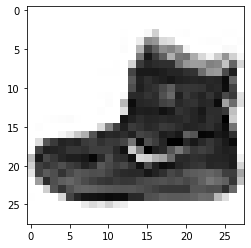

In [20]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0],cmap='Greys')

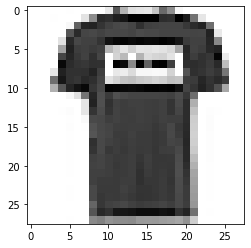

In [21]:
import matplotlib.pyplot as plt
plt.imshow(train_X[1],cmap='Greys')

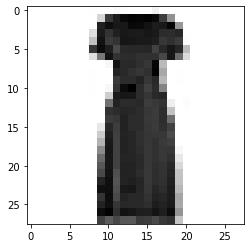

In [22]:
import matplotlib.pyplot as plt
plt.imshow(train_X[50],cmap='Greys')

In [27]:
class_labels=['T-shirt','Trouser','pullover','Dress','coat','sandal','shirt','Sneakers','bag','Ankle boot']

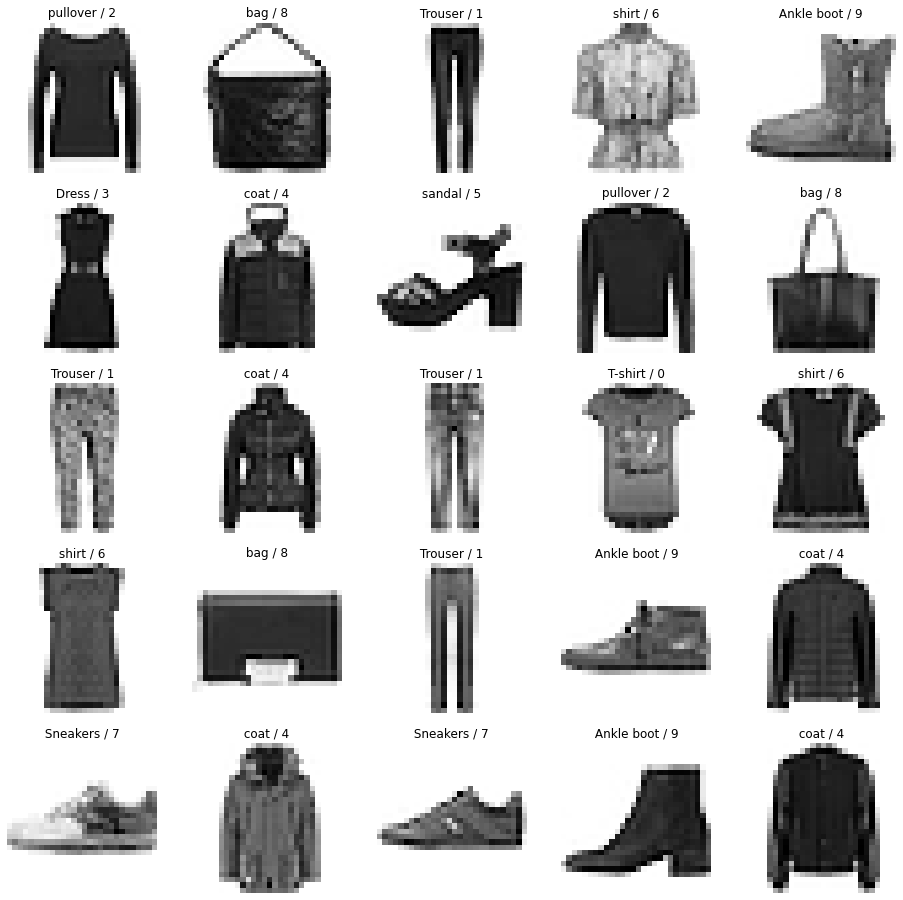

In [28]:
import numpy as np 

plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1500,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(train_X[i],cmap='Greys')
  plt.axis('off')
  plt.title(' {} / {} '.format(class_labels[train_y[i]],train_y[i]))

In [31]:
train_X=train_X.reshape(train_X.shape[0],784)
train_X.shape

(60000, 784)

In [32]:
test_X=test_X.reshape(test_X.shape[0],784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
test_X.shape

(10000, 784)

## Scaling


In [34]:
train_X=train_X/255
test_X=test_X/225

# Machine learning model

In [35]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Make Predict

In [36]:
y_pred=model.predict(test_X)

In [37]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Check performance

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_pred,test_y)*100,'%')

Accuracy :  86.46000000000001 %


Text(0.5, 1.0, 'prediction : pullover / Actual : pullover')

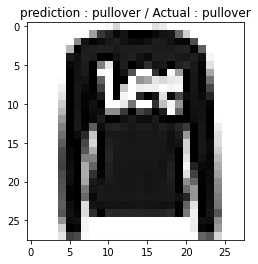

In [41]:
test_X=test_X.reshape(test_X.shape[0],28,28)

import matplotlib.pyplot as plt
plt.imshow(test_X[1],cmap='Greys')
plt.title('prediction : {} / Actual : {}'.format(class_labels[y_pred[1]],class_labels[test_y[1]]))